# Import required packages



In [86]:
# Import libraries
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
sns.set()
sns.set_style("whitegrid")

Load data

In [87]:

train_data = pd.read_csv("C:\\Users\\lenovo\\Desktop\\datafraud.csv")

In [88]:
#Retrieving first 5 rows of a dataset
train_data.head()


,S,A,F,J,G
0,0,2,1,0,1
1,0,0,1,0,1
2,0,2,1,0,1
3,0,1,1,0,1
4,0,2,0,1,1


# Visualizing and Analyzing data-I


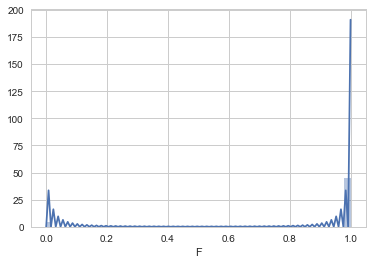

In [89]:
sns.distplot(train_data['F'])

##Features available
Sex: Represents only two fields i.e 0 and 1.
Age: Represents people belonging to any one of the three groups i.e 0 or 1 or 2.
Fraud:Represents only two fields i.e 0 and 1.
Jewellary:Represents only two fields i.e 0 and 1.
Gas:Represents only two fields i.e 0 and 1.

since all the dimensions are numeric and most of them are 0 and 1 there is no need for outlier detection.

In [24]:
train_data.describe()

,S,A,F,J,G
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.504200,1.099400,0.902600,0.137600,0.971000
std,0.500007,0.772515,0.296516,0.344497,0.167815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000


In [90]:
#lets check if there is any missing data
raw_features = train_data.columns

for feature in raw_features:
    content_prop = len(train_data[train_data[feature].notnull() == True].index)/len(train_data.index)
    print(feature, content_prop)
   # By observation we can know that there is no missing in the data

S 1.0
A 1.0
F 1.0
J 1.0
G 1.0


# Visualizing and Analyzing data-II


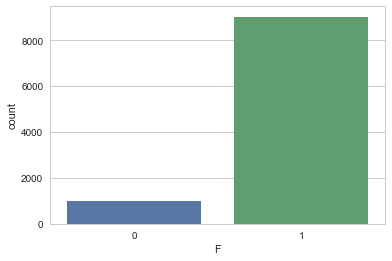

In [91]:
#Now, we will apply countplot function to know how many fraud records are recorded in total
sns.countplot(x='F',data=train_data)

By observation,we observe that there are more than 8000 records which are recorded as fraud

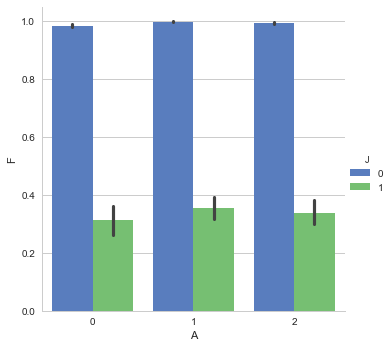

In [92]:
g = sns.factorplot(x="A", y="F", hue="J", data=train_data,size=5, kind="bar", palette="muted")
#From the below graph, we observe that irrespective of age of a person, if there are Jewellery transactions then 
#there is less probability that the transaction is fraud.

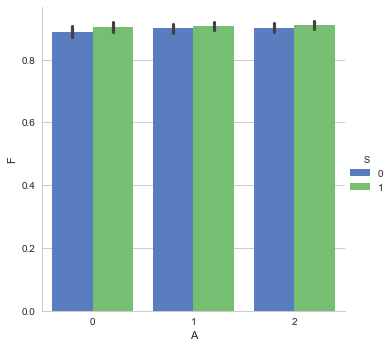

In [93]:
g = sns.factorplot(x="A", y="F", hue="S", data=train_data,
                             size=5, kind="bar", palette="muted")
#From the below graph irrespective of age and sex the probability that the  transaction is fraud is high.

# Visualizing and Analyzing data-III

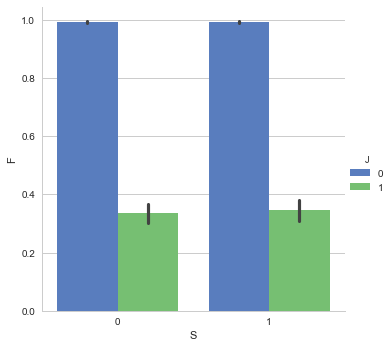

In [94]:
g = sns.factorplot(x="S", y="F",hue='J', data=train_data,
                             size=5, kind="bar", palette="muted")

From the above graph, we observe that irrespective of sex, the probability that a transaction is fraud is more if there is no Jewellery transaction

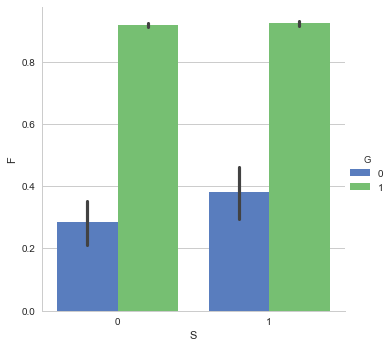

In [95]:
g = sns.factorplot(x="S", y="F",hue='G' ,data=train_data,
                             size=5, kind="bar", palette="muted")
#From the below graph, we observe that irrespective of sex, the probability that a transaction is
#fraud is more if there is a Gas transaction.

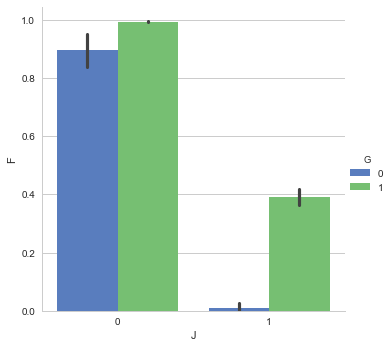

In [96]:
g = sns.factorplot(x="J", y="F",hue='G' ,data=train_data,
                             size=5, kind="bar", palette="muted")
#From the below graph, we observe if there is a no Jewellery transaction and either Gas transaction
#exists or not, the probability that a transaction is fraud is more. if there is a Jewellery transaction 
#and no Gas transaction then there is 0 probability of that transaction being a fraud.

# Building Model and Prediction

 Logistic Regression using Statsmodels

In [59]:
features = ['J','G']
log_model = sm.Logit(train_data['F'], train_data[features]).fit()
y_pred = log_model.predict(train_data[features])
roc_fraud = roc_curve(train_data[['F']], y_pred)

Optimization terminated successfully.
         Current function value: 0.121381
         Iterations 9


Ploting Graph

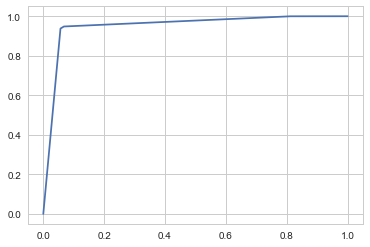

In [49]:
sns.set_style("whitegrid")
plt.plot(roc_fraud[0], roc_fraud[1])
plt.show()
